# **Mall Customer Segmentation | KMeans & DBSCAN**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [6]:
df=df.drop('CustomerID',axis=1)

<Axes: >

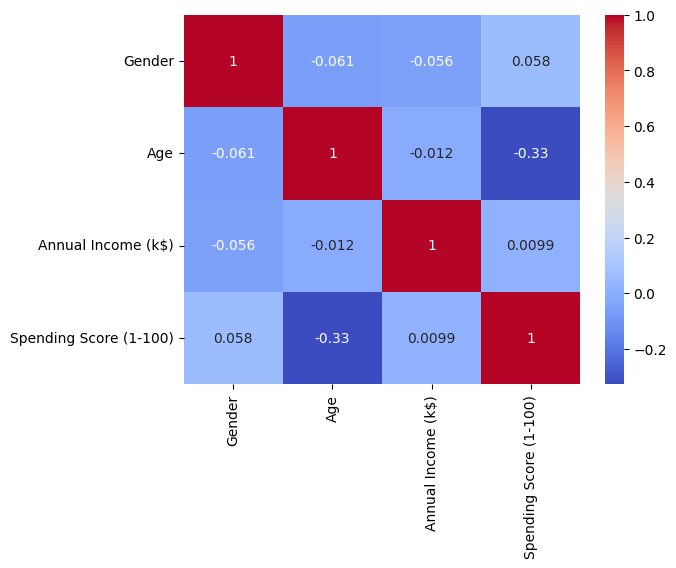

In [7]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [8]:
fig= px.scatter(df, x="Annual Income (k$)", y="Spending Score (1-100)", size="Annual Income (k$)", color="Gender", hover_name="Age")
fig.show()

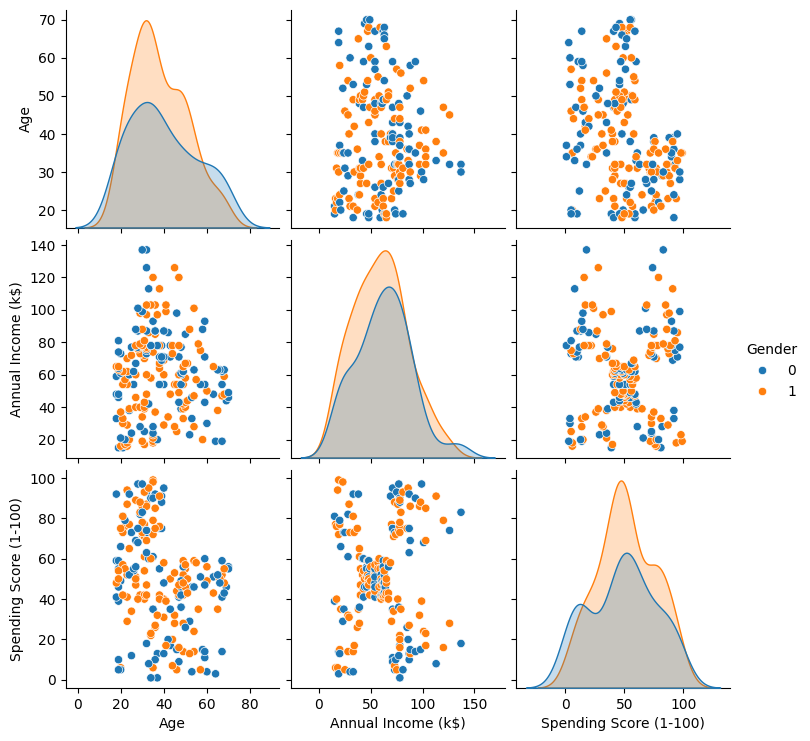

In [9]:
sns.pairplot(df, hue='Gender', kind='scatter', diag_kind='kde')

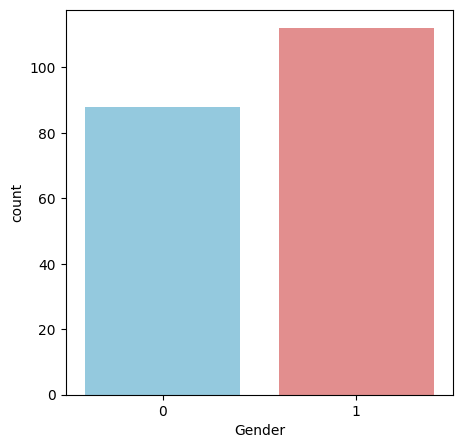

In [10]:
plt.figure(figsize=(5, 5))
sns.countplot(x="Gender", data=df, palette=['skyblue', 'lightcoral'])
plt.show()

In [11]:
Features = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [12]:
sse = []
for i in range (1, 20):
    km = KMeans(n_clusters=i)
    km.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])
    sse.append(km.inertia_)

In [13]:
sse

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73679.78903948837,
 44454.47647967972,
 37233.81451071002,
 32278.293453087783,
 25372.8237802977,
 21881.87850706096,
 19657.783608703947,
 18400.743148053498,
 15838.717785514093,
 16004.722307663096,
 13726.789338822095,
 12492.71962091962,
 11074.551558967347,
 11057.688582251076,
 9923.867186147181,
 9355.824397803106]

# **Elbow plot**

([<matplotlib.axis.XTick at 0x7cacc92a3590>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

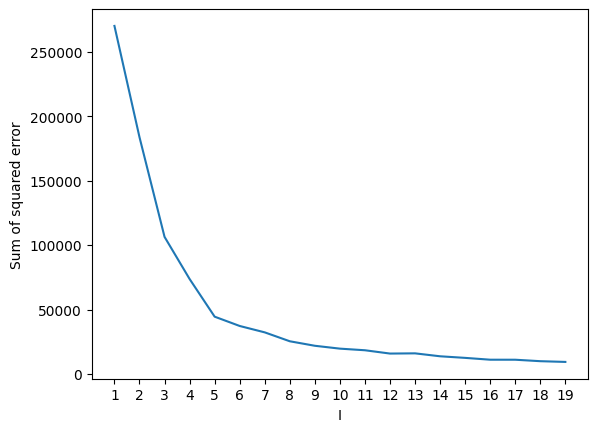

In [14]:
plt.plot(range(1, 20), sse)
plt.xlabel("I")
plt.ylabel("Sum of squared error")
plt.xticks(range(1, 20))


# **KMeans**

In [15]:
model = KMeans(n_clusters= 5 )
y_predict = model.fit_predict(Features)
y_predict

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 0, 4, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [16]:
df["Cluster"] = y_predict
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,3
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,2
4,1,31,17,40,3
5,1,22,17,76,2
6,1,35,18,6,3
7,1,23,18,94,2
8,0,64,19,3,3
9,1,30,19,72,2


In [17]:
fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='Cluster', size_max=100)

# Show the plot
fig.show()

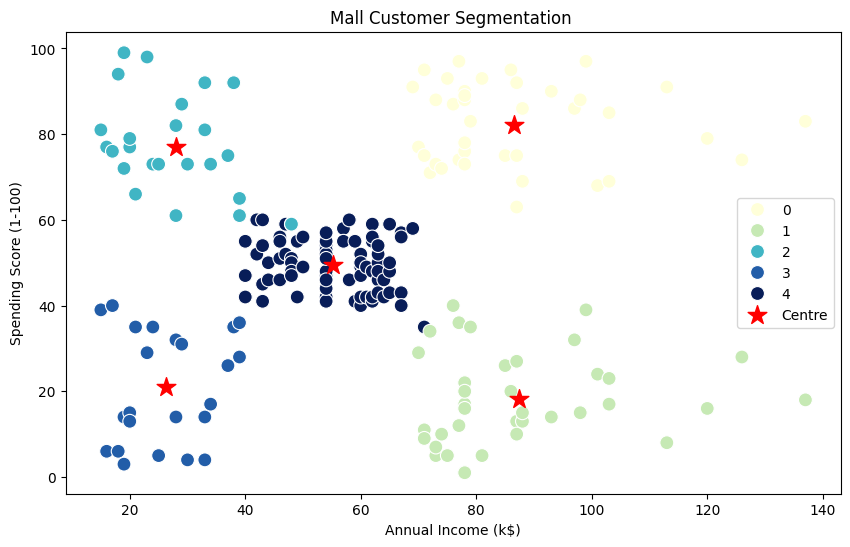

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='YlGnBu', s=100)
plt.scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:, 2], s=200, c='red', marker='*', label='Centre')
plt.title('Mall Customer Segmentation ')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [19]:
fig = px.pie(df, values = "Annual Income (k$)" , names = "Cluster", title="Mall Customer Segmentation ")
fig.show()

# **Agglomerative Clustering**

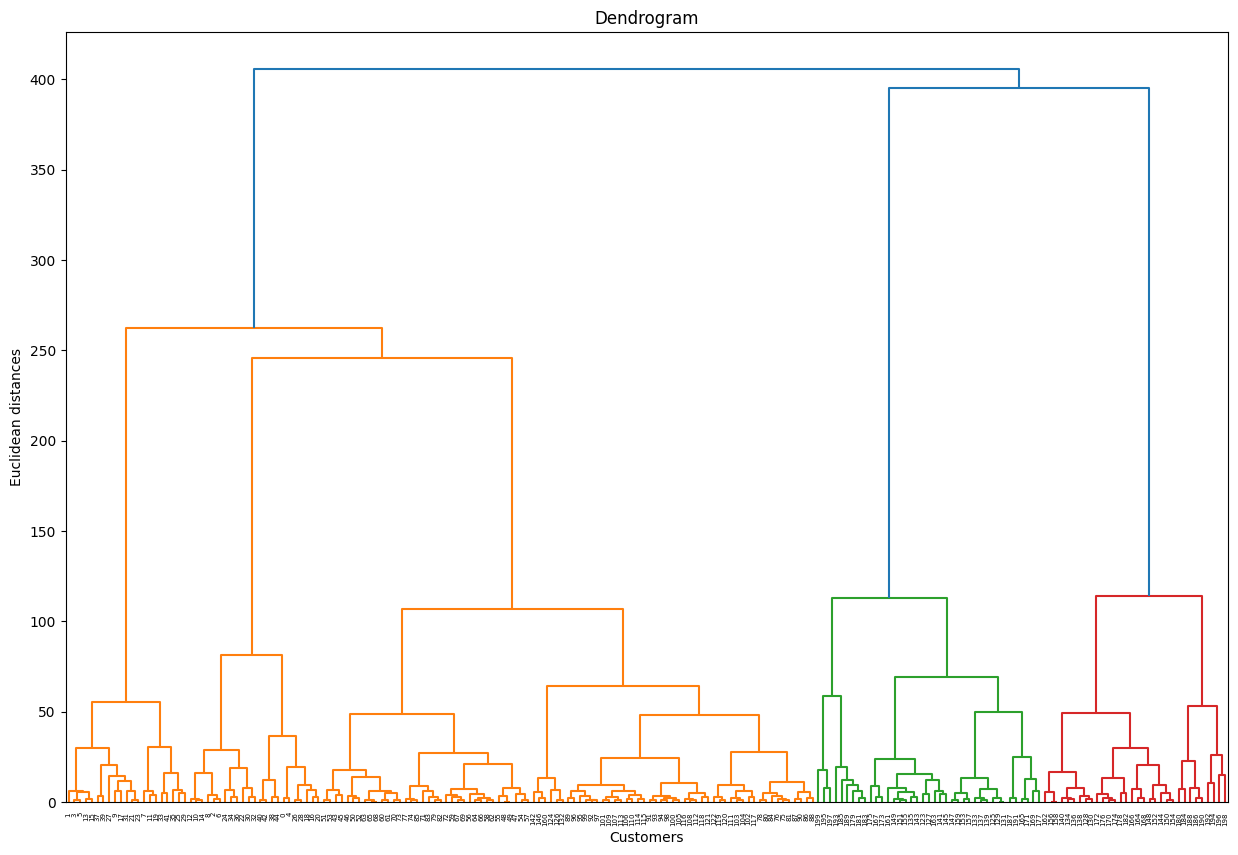

In [20]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
plt.figure(figsize=(15,10))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

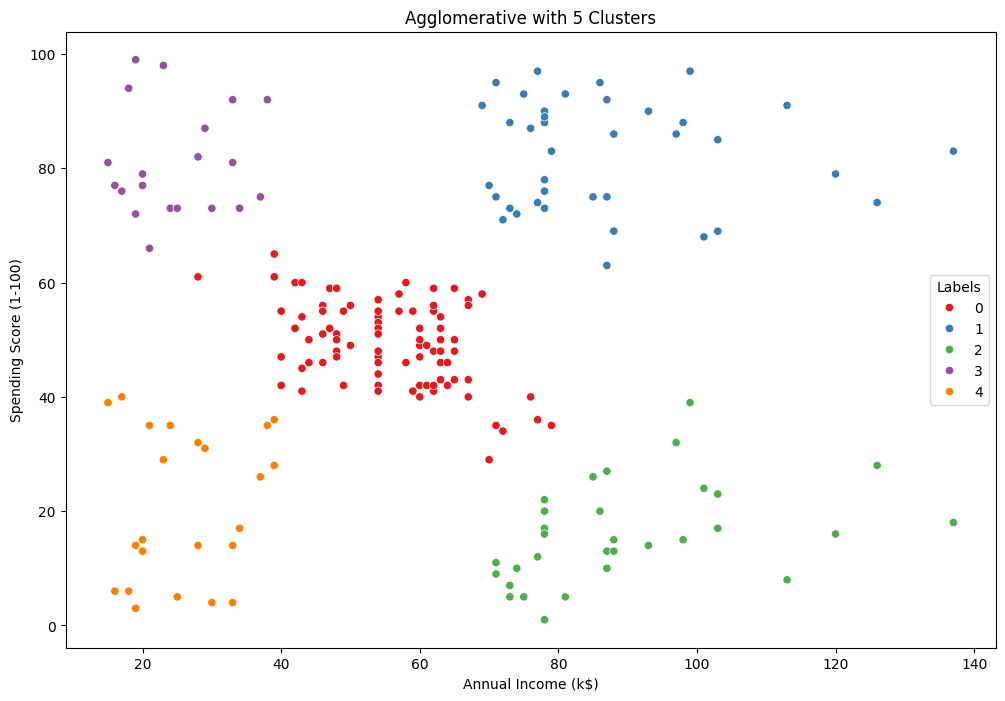

In [24]:
agglom = AgglomerativeClustering(n_clusters=5, metric = 'euclidean',
linkage='ward')
y1 = agglom.fit_predict(df)
df['Labels'] = y1
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels', data=df, palette='Set1')
plt.title('Agglomerative with 5 Clusters')
plt.show()

# **DBSCAN**

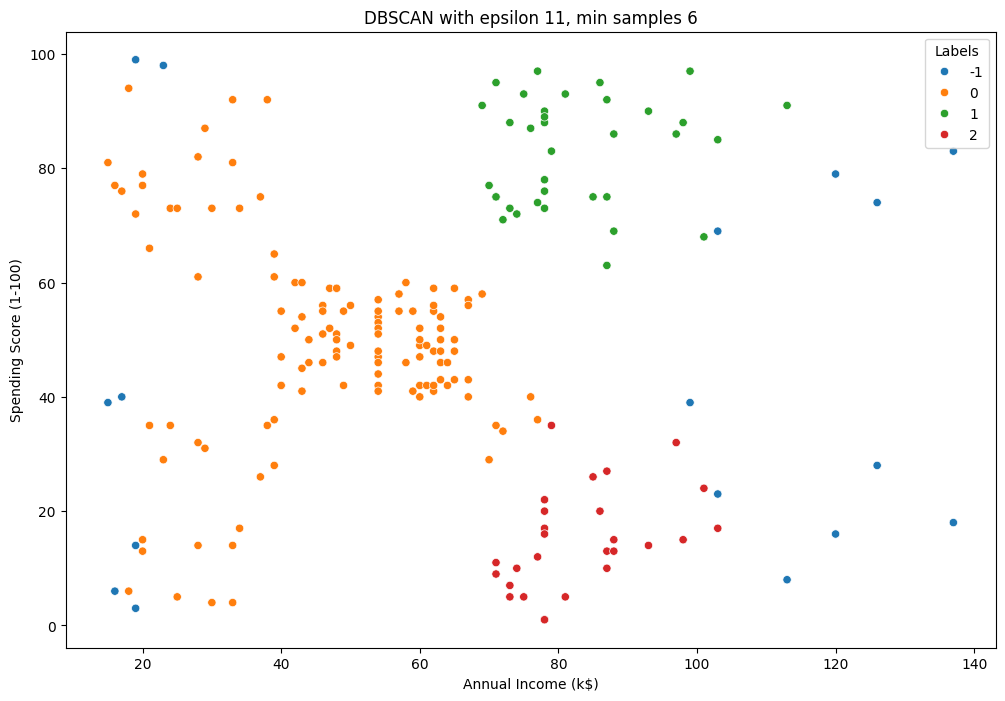

In [25]:
db = DBSCAN(eps=15, min_samples=6)
y = db.fit_predict(df)
df['Labels'] = y
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Labels',
    data=df,
    palette=sns.color_palette('tab10', len(np.unique(y)))
)
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

In [26]:
kmeans_silhouette = silhouette_score(df, y_predict)
hierarchical_silhouette = silhouette_score(df, y1)
dbscan_silhouette = silhouette_score(df, y)

print("Silhouette Score:")
print("K-means Silhouette Score:", kmeans_silhouette)
print("Hierarchical Silhouette Score:", hierarchical_silhouette)
print("DBScan Silhouette Score:", dbscan_silhouette)

Silhouette Score:
K-means Silhouette Score: 0.4407350968934168
Hierarchical Silhouette Score: 0.4408603562628428
DBScan Silhouette Score: 0.30855243600964244
